# Single Graph Drawing

#### Load packages

In [13]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

#### Load data

In [14]:
# This is a sampling for entire analysis
data_astronomy1 = pd.read_excel('data/Astronomy.xlsx', sheet_name='강민철')
data_astronomy2 = pd.read_excel('data/Astronomy.xlsx', sheet_name='강지헌')

# Drop an useless column
data_astronomy1.drop('Name', axis=1, inplace=True)
data_astronomy2.drop('Name', axis=1, inplace=True)

# Merge all dataframes into one dataframe:
data_astronomy = pd.concat([data_astronomy1, data_astronomy2], axis=0)
data_astronomy.drop(data_astronomy.loc[data_astronomy['ID'] == 53].index[0], inplace=True)
# data_astronomy

In [15]:
data_sampling1 = pd.read_excel('data/Sampling.xlsx', sheet_name='강지헌')
data_sampling2 = pd.read_excel('data/Sampling.xlsx', sheet_name='신아현')
data_sampling3 = pd.read_excel('data/Sampling.xlsx', sheet_name='신수연')

data_sampling1.drop('Name', axis=1, inplace=True)
data_sampling2.drop('Name', axis=1, inplace=True)
data_sampling3.drop('Name', axis=1, inplace=True)

data_sampling = pd.concat([data_sampling1, data_sampling2, data_sampling3], axis=0)
# data_sampling

In [16]:
data_database1 = pd.read_excel('data/Database.xlsx', sheet_name='신수연')
data_database2 = pd.read_excel('data/Database.xlsx', sheet_name='양연선')
data_database3 = pd.read_excel('data/Database.xlsx', sheet_name='김나영')

data_database1.drop('Name', axis=1, inplace=True)
data_database2.drop('Name', axis=1, inplace=True)
data_database3.drop('Name', axis=1, inplace=True)

data_database = pd.concat([data_database1, data_database2, data_database3], axis=0)
# data_database

#### Process graphs
- 이름 형식: `<Domain>_<Modality>_<ID>`
- Domain: `ASTRONOMY`, `SAMPLING`, `DATABASE`

In [17]:
graphs_astronomy = {}

for id, sub_df in data_astronomy.groupby('ID'):
    # New graph object
    graph_name = f"Astronomy_{sub_df['Mod.'].iloc[0]}_{sub_df['ID'].iloc[0]}"
    G = nx.DiGraph()
    
    # Add nodes and edges
    for _, row in sub_df.iterrows():
        start_node = row['Start']
        if pd.notna(row['End']):
            end_nodes = [end_node.rstrip() for end_node in row['End'].split(',')]
            for end_node in end_nodes:
                G.add_edge(start_node, end_node)
        # Add p.knowledge labels:  O -> 1(true)  |  X -> 0(false)
        try:
            G.nodes[start_node]['P.Knowledge'] = 1 if row['P.Knowledge'] == 'O' else 0
        except KeyError:
            G.add_node(start_node)
            G.nodes[start_node]['P.Knowledge'] = 0
    
    # Save the graph
    graphs_astronomy[graph_name] = G

In [18]:
graphs_sampling = {}

for id, sub_df in data_sampling.groupby('ID'):
    # New graph object
    graph_name = f"Sampling_{sub_df['Mod.'].iloc[0]}_{sub_df['ID'].iloc[0]}"
    G = nx.DiGraph()
    
    # Add nodes and edges
    for _, row in sub_df.iterrows():
        start_node = row['Start']
        if pd.notna(row['End']):
            end_nodes = [end_node.rstrip() for end_node in row['End'].split(',')]
            for end_node in end_nodes:
                G.add_edge(start_node, end_node)
        # Add p.knowledge labels:  O -> 1(true)  |  X -> 0(false)
        try:
            G.nodes[start_node]['P.Knowledge'] = 1 if row['P.Knowledge'] == 'O' else 0
        except KeyError:
            G.add_node(start_node)
            G.nodes[start_node]['P.Knowledge'] = 0
    
    # Save the graph
    graphs_sampling[graph_name] = G

In [19]:
graphs_database = {}

for id, sub_df in data_database.groupby('ID'):
    # New graph object
    graph_name = f"Database_{sub_df['Mod.'].iloc[0]}_{sub_df['ID'].iloc[0]}"
    G = nx.DiGraph()
    
    # Add nodes and edges
    for _, row in sub_df.iterrows():
        start_node = row['Start']
        if pd.notna(row['End']):
            end_nodes = [end_node.rstrip() for end_node in row['End'].split(',')]
            for end_node in end_nodes:
                G.add_edge(start_node, end_node)
        # Add p.knowledge labels:  O -> 1(true)  |  X -> 0(false)
        try:
            G.nodes[start_node]['P.Knowledge'] = 1 if row['P.Knowledge'] == 'O' else 0
        except KeyError:
            G.add_node(start_node)
            G.nodes[start_node]['P.Knowledge'] = 0
    
    # Save the graph
    graphs_database[graph_name] = G

#### Draw graphs
*Draw가 필요한 부분 코드만 주석 해제하여 사용바람*

In [20]:
# Set Korean font
import matplotlib.font_manager as fm 
from matplotlib import rc
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# Drawing method
def draw_graph(graph_dict: dict, selected_graph: str=None, pos_function=nx.spring_layout):
    """This function is used to draw the graph from the `graph_dict`

    Args:
        graph_dict (`dict`): A processed graph dictionary
        selected_graph (`str`, optional): The name of the graph to be drawn. Defaults to None. 
                                          If None, it will draw all graphs in the dictionary.
        pos_function (`function`, optional): A networkx layout function to calculate node positions. 
                                             Defaults to `nx.spring_layout`.
    """
    for graph_name, G in graph_dict.items():
        if selected_graph is not None and graph_name != selected_graph:
            continue
        
        pos = pos_function(G)
        # labels = {node: f"{node} ({G.nodes[node].get('P.Knowledge', 'N/A')})" for node in G.nodes()}
        plt.figure(figsize=(10, 7))
        nx.draw(G, pos, with_labels=False, node_size=50, node_color="blue", edge_color="gray", alpha=0.7) # You can add `labels=labels` and `font_family=font_name`.
        plt.title(f"{graph_name}")
        plt.show()
        
        if selected_graph is not None:
            break

    plt.close()


In [21]:
# draw_graph(graphs_astronomy)  # Draw all graphs

In [22]:
# draw_graph(graphs_sampling)   # Draw all graphs

In [23]:
# draw_graph(graphs_database)   # Draw all graphs

#### A high-score student and a low-score student
*(Representatives)*

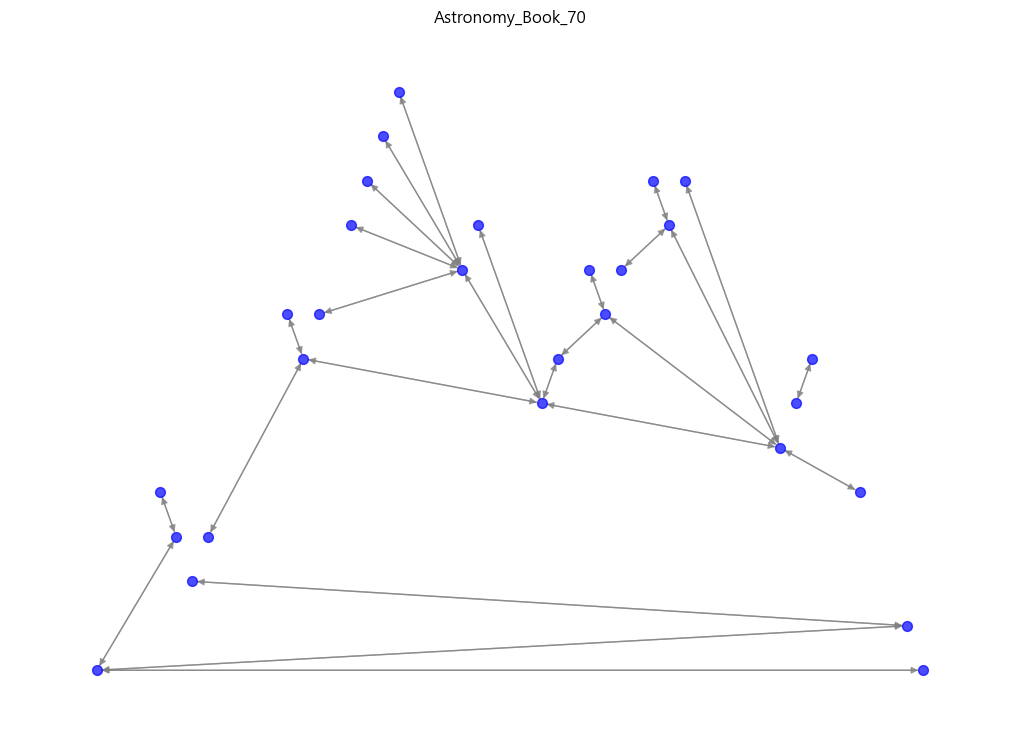

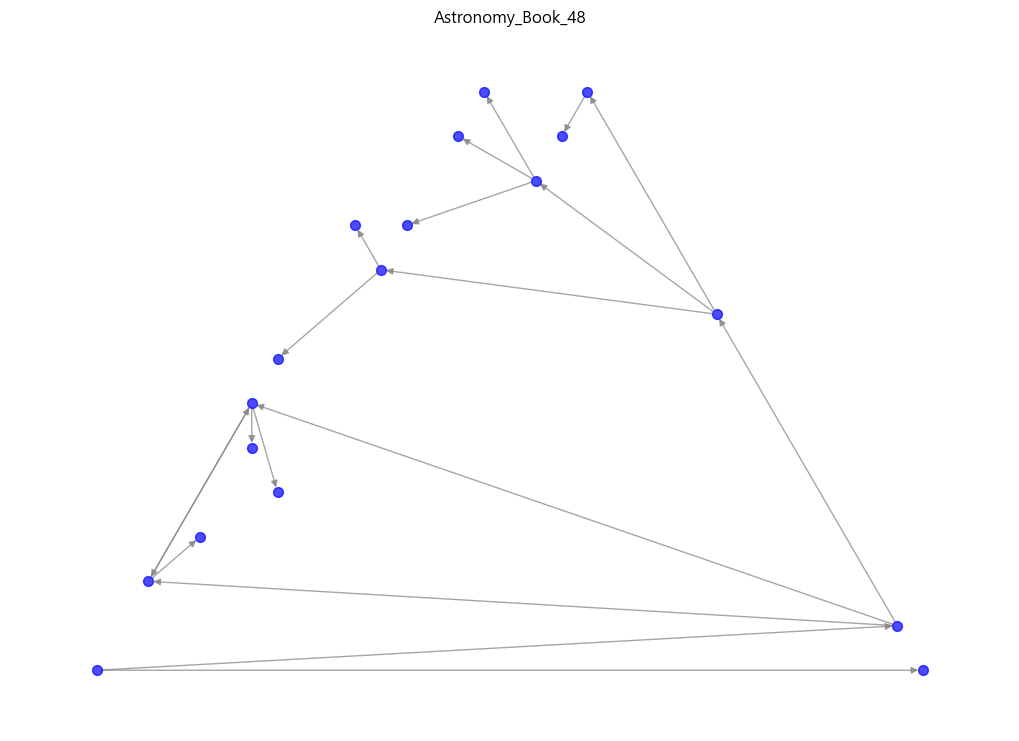

In [25]:
# High-score
draw_graph(graphs_astronomy, "Astronomy_Book_70", nx.planar_layout)

# Low-score
draw_graph(graphs_astronomy, "Astronomy_Book_48", nx.planar_layout)